# Guia 5 - Filtros

## Ejercicio 2

Diseñe un filtro FIR cuyas bandas de paso están en los intervalos de $[100,200]$, $[1640,3028]$, $[5000,6000]$ Hz. En la última banda de paso, se requiere que el filtro tenga una respuesta en frecuencia cuya magnitud sea proporcional a la frecuencia, partiendo desde 0 y terminando en 1.

/home/lucas/.local/lib/python3.13/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/lucas/.local/lib/python3.13/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


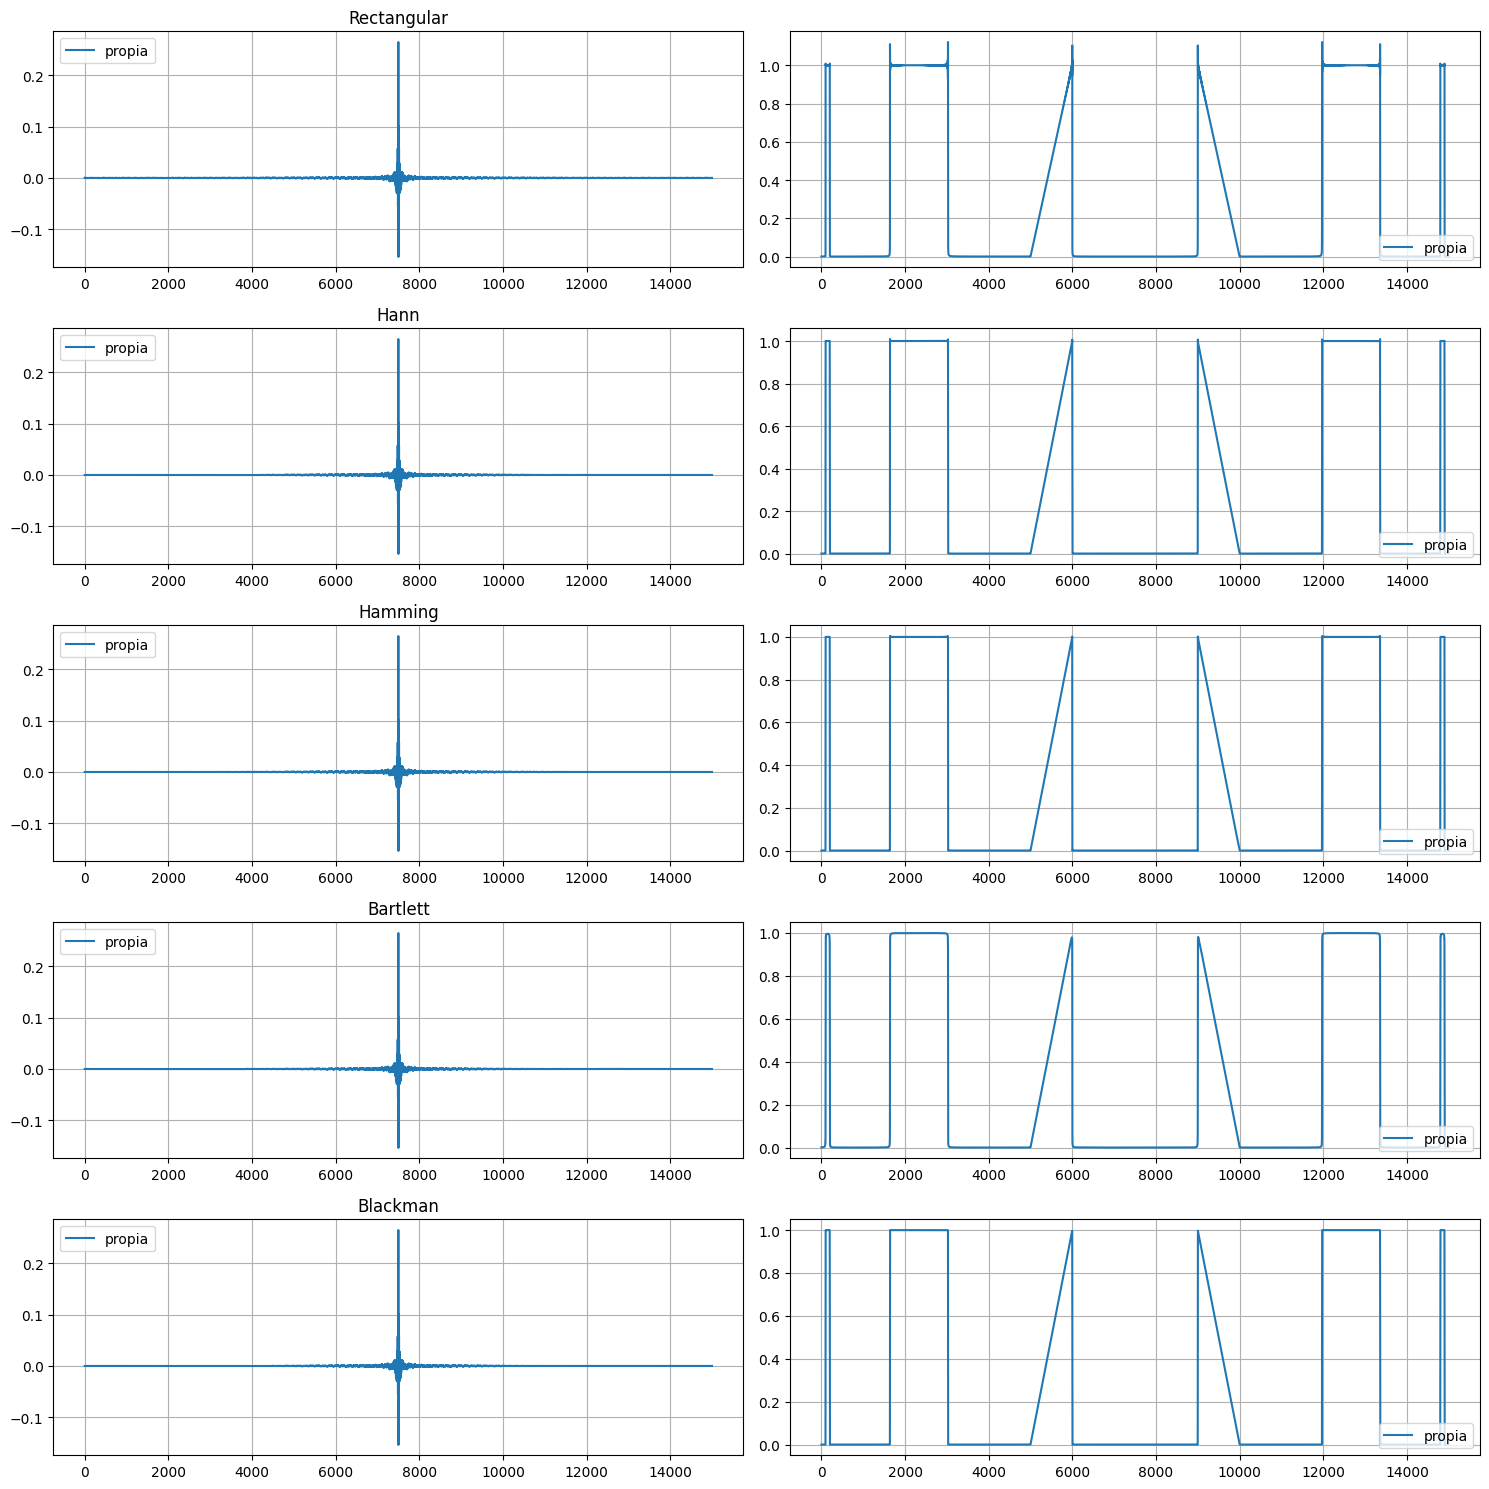

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin

def rectangular(s,Nini,Nfin):
    '''Ventana rectangular aplicada a s entre las muestras Nini y Nfin'''
    w = np.ones(Nfin-Nini)
    if Nini > 0:
        w = np.concatenate([np.zeros(Nini-1),w])
    if Nfin < len(s):
        w = np.concatenate([w,np.zeros(len(s)-len(w))])

    return np.multiply(w,s)

def hann(s,Nini,Nfin):
    '''Ventana de Hann aplicada a s entre las muestras Nini y Nfin'''
    N = Nfin-Nini
    n = np.linspace(0,N,N)

    aux = 2*np.pi/N
    w = [0.5 for _ in range(N)] - 0.5 * np.cos(aux*n)
    if Nini > 0:
        w = np.concatenate([np.zeros(Nini-1),w])
    if Nfin < len(s):
        w = np.concatenate([w,np.zeros(len(s)-len(w))])

    return np.multiply(w,s)

def hamming(s,Nini,Nfin):
    '''Ventana de Hamming aplicada a s entre las muestras Nini y Nfin'''
    N = Nfin-Nini
    n = np.linspace(0,N,N)

    aux = 2*np.pi/N
    w = [27/50 for _ in range(N)] - 23/50 * np.cos(aux*n)
    if Nini > 0:
        w = np.concatenate([np.zeros(Nini-1),w])
    if Nfin < len(s):
        w = np.concatenate([w,np.zeros(len(s)-len(w))])

    return np.multiply(w,s)

def bartlett(s,Nini,Nfin):
    '''Ventana de Bartlett aplicada a s entre las muestras Nini y Nfin'''
    N = Nfin-Nini
    n = np.linspace(0,N,N)

    aux = 2.0/N
    w = np.where(np.less_equal(n,N/2.0),n*aux,[2 for _ in range(N)] - n*aux)
    if Nini > 0:
        w = np.concatenate([np.zeros(Nini-1),w])
    if Nfin < len(s):
        w = np.concatenate([w,np.zeros(len(s)-len(w))])

    return np.multiply(w,s)

def blackman(s,Nini,Nfin):
    '''Ventana de Blackman aplicada a s entre las muestras Nini y Nfin'''
    N = Nfin-Nini
    n = np.linspace(0,N,N)

    aux = 2*np.pi/N
    w = [21/50 for _ in range(N)] - 0.5*np.cos(aux*n) + (2/25)*np.cos(2*aux*n)
    if Nini > 0:
        w = np.concatenate([np.zeros(Nini-1),w])
    if Nfin < len(s):
        w = np.concatenate([w,np.zeros(len(s)-len(w))])

    return np.multiply(w,s)

def retardar(X,i):
    N = len(X)
    k = np.arange(N)
    exp = np.exp(-2j*np.pi*k*i/N)
    Xret = X*exp
    return Xret

def pasabandaFreq(fm,f1,f2):
    '''genera la respuesta en frecuencia para un filtro pasa alto de frecuencia muestreal fm para frecuencias >= f'''
    k = np.arange(fm)
    H = np.where(np.logical_and(np.greater_equal(k,f1),np.less_equal(k,f2)), 1, 0)
    H = np.where(np.logical_and(np.greater_equal(k,fm-f2),np.less_equal(k,fm-f1)), 1, H)
    return H

def FIRPasaBanda(fm,f1,f2,N,W):
    '''Genera un h[n] de un filtro pasa banda para frecuencias f1 <= k <= f2, con duracion N muestras y aplicando la ventana W'''

    # Generar respuesta en frecuencia deseada
    X = pasabandaFreq(fm,f1,f2)

    # Aplicar retardo
    X = retardar(X,N/2)

    # Antitransformar
    x = np.fft.ifft(X)

    # Aplicar ventana
    x = W(x,0,N)

    # Devolver recortada
    return x[:N]

def ascendenteFreq(fm,f1,f2):
    k = np.arange(fm)

    H = [0 for _ in range(len(k))]
    for i in range(f2-f1):
        H[f1+i] = i/(f2-f1)
        H[fm-f1-i] = i/(f2-f1)

    return H

def FIRBandaAscendente(fm,f1,f2,N,W):
    # Generar respuesta en frecuencia deseada
    X = ascendenteFreq(fm,f1,f2)

    # Aplicar retardo
    X = retardar(X,N/2)

    # Antitransformar
    x = np.fft.ifft(X)

    # Aplicar ventana
    x = W(x,0,N)

    # Devolver recortada
    return x[:N]

# Parametros
fm = 15000

hrectangular = FIRPasaBanda(fm,100,200,14998,rectangular) + FIRPasaBanda(fm,1640,3028,14998,rectangular) + FIRBandaAscendente(fm,5000,6000,14998,rectangular)
hhann = FIRPasaBanda(fm,100,200,14998,hann) + FIRPasaBanda(fm,1640,3028,14998,hann) + FIRBandaAscendente(fm,5000,6000,14998,hann)
hhamming = FIRPasaBanda(fm,100,200,14998,hamming) + FIRPasaBanda(fm,1640,3028,14998,hamming) + FIRBandaAscendente(fm,5000,6000,14998,hamming)
hbartlett = FIRPasaBanda(fm,100,200,14998,bartlett) + FIRPasaBanda(fm,1640,3028,14998,bartlett) + FIRBandaAscendente(fm,5000,6000,14998,bartlett)
hblackman = FIRPasaBanda(fm,100,200,14998,blackman) + FIRPasaBanda(fm,1640,3028,14998,blackman) + FIRBandaAscendente(fm,5000,6000,14998,blackman)

fig, ax = plt.subplots(5,2)
fig.set_figheight(15)
fig.set_figwidth(15)
for axi in ax:
    for axj in axi:
        axj.grid()

ax[0][0].plot(hrectangular, label='propia')
ax[0][0].set_title('Rectangular')
ax[0][0].legend(loc='upper left')
ax[1][0].plot(hhann, label='propia')
ax[1][0].set_title('Hann')
ax[1][0].legend(loc='upper left')
ax[2][0].plot(hhamming, label='propia')
ax[2][0].set_title('Hamming')
ax[2][0].legend(loc='upper left')
ax[3][0].plot(hbartlett, label='propia')
ax[3][0].set_title('Bartlett')
ax[3][0].legend(loc='upper left')
ax[4][0].plot(hblackman, label='propia')
ax[4][0].set_title('Blackman')
ax[4][0].legend(loc='upper left')

ax[0][1].plot(np.abs(np.fft.fft(hrectangular)), label='propia')
ax[0][1].legend(loc='lower right')
ax[1][1].plot(np.abs(np.fft.fft(hhann)), label='propia')
ax[1][1].legend(loc='lower right')
ax[2][1].plot(np.abs(np.fft.fft(hhamming)), label='propia')
ax[2][1].legend(loc='lower right')
ax[3][1].plot(np.abs(np.fft.fft(hbartlett)), label='propia')
ax[3][1].legend(loc='lower right')
ax[4][1].plot(np.abs(np.fft.fft(hblackman)), label='propia')
ax[4][1].legend(loc='lower right')
fig.tight_layout()

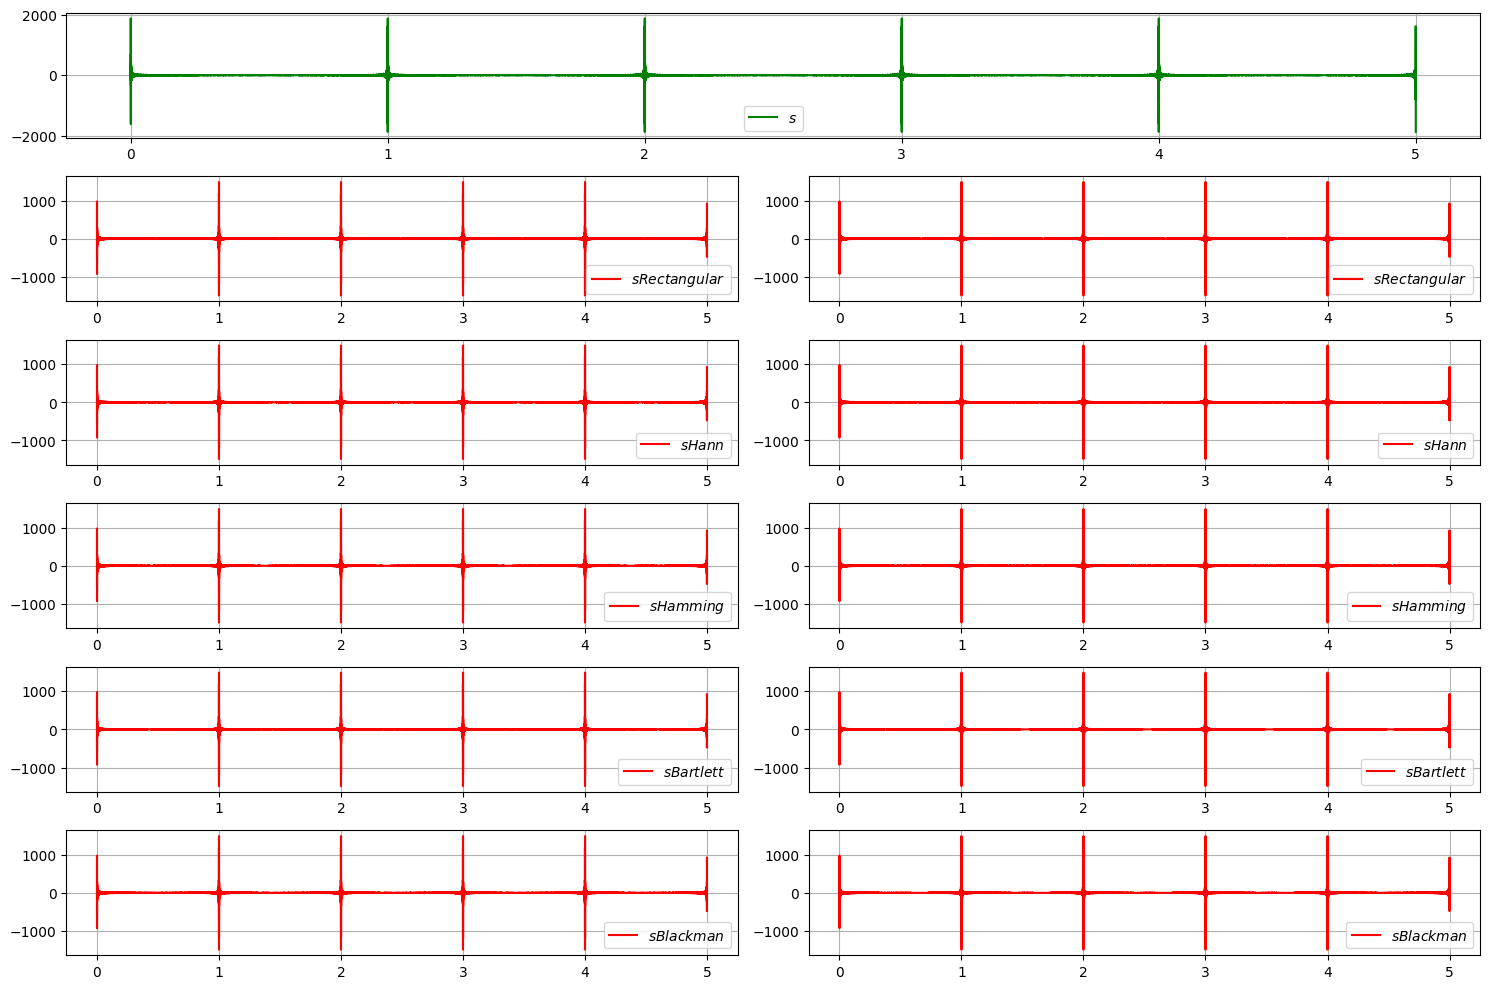

In [2]:
import random

# Parametros
Tini = 0
Tfin = 5
fm = 15000

# Generar senial con un ruido de 50Hz
t = np.linspace(Tini,Tfin,int(fm*(Tfin-Tini)), endpoint=False)

s = [0 for _ in range(len(t))]
for i in range(101,200):
    s += np.sin(2*np.pi*i*t)
for i in range(1641,3028):
    s += np.sin(2*np.pi*i*t)
for i in range(5001,6000):
    s += np.sin(2*np.pi*i*t)

# Filtrar senial
filtroRectangular = FIRPasaBanda(fm,100,200,13000,rectangular) + FIRPasaBanda(fm,1640,3028,13000,rectangular) + FIRBandaAscendente(fm,5000,6000,13000,rectangular)
filtroHann = FIRPasaBanda(fm,100,200,13000,hann) + FIRPasaBanda(fm,1640,3028,13000,hann) + FIRBandaAscendente(fm,5000,6000,13000,hann)
filtroHamming = FIRPasaBanda(fm,100,200,13000,hamming) + FIRPasaBanda(fm,1640,3028,13000,hamming) + FIRBandaAscendente(fm,5000,6000,13000,hamming)
filtroBartlett = FIRPasaBanda(fm,100,200,13000,bartlett) + FIRPasaBanda(fm,1640,3028,13000,bartlett) + FIRBandaAscendente(fm,5000,6000,13000,bartlett)
filtroBlackman = FIRPasaBanda(fm,100,200,13000,blackman) + FIRPasaBanda(fm,1640,3028,13000,blackman) + FIRBandaAscendente(fm,5000,6000,13000,blackman)
filtroRectangular2 = FIRPasaBanda(fm,100,200,15000,rectangular) + FIRPasaBanda(fm,1640,3028,15000,rectangular) + FIRBandaAscendente(fm,5000,6000,15000,rectangular)
filtroHann2 = FIRPasaBanda(fm,100,200,15000,hann) + FIRPasaBanda(fm,1640,3028,15000,hann) + FIRBandaAscendente(fm,5000,6000,15000,hann)
filtroHamming2 = FIRPasaBanda(fm,100,200,15000,hamming) + FIRPasaBanda(fm,1640,3028,15000,hamming) + FIRBandaAscendente(fm,5000,6000,15000,hamming)
filtroBartlett2 = FIRPasaBanda(fm,100,200,15000,bartlett) + FIRPasaBanda(fm,1640,3028,15000,bartlett) + FIRBandaAscendente(fm,5000,6000,15000,bartlett)
filtroBlackman2 = FIRPasaBanda(fm,100,200,15000,blackman) + FIRPasaBanda(fm,1640,3028,15000,blackman) + FIRBandaAscendente(fm,5000,6000,15000,blackman)

sRectangular = np.convolve(s,filtroRectangular,mode='same')
sHann = np.convolve(s,filtroHann,mode='same')
sHamming = np.convolve(s,filtroHamming,mode='same')
sBartlett = np.convolve(s,filtroBartlett,mode='same')
sBlackman = np.convolve(s,filtroBlackman,mode='same')
sRectangular2 = np.convolve(s,filtroRectangular2,mode='same')
sHann2 = np.convolve(s,filtroHann2,mode='same')
sHamming2 = np.convolve(s,filtroHamming2,mode='same')
sBartlett2 = np.convolve(s,filtroBartlett2,mode='same')
sBlackman2 = np.convolve(s,filtroBlackman2,mode='same')

# Graficar
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(15)
ax = [
    plt.subplot2grid([6,1],[0,0]),
    plt.subplot2grid([6,2],[1,0]),
    plt.subplot2grid([6,2],[1,1]),
    plt.subplot2grid([6,2],[2,0]),
    plt.subplot2grid([6,2],[2,1]),
    plt.subplot2grid([6,2],[3,0]),
    plt.subplot2grid([6,2],[3,1]),
    plt.subplot2grid([6,2],[4,0]),
    plt.subplot2grid([6,2],[4,1]),
    plt.subplot2grid([6,2],[5,0]),
    plt.subplot2grid([6,2],[5,1]),
]
for axi in ax:
    axi.grid()

ax[0].plot(t,s,label='$s$',color='g')
ax[0].legend()

ax[1].plot(t,sRectangular,label='$sRectangular$', color='r')
ax[1].legend()
ax[2].plot(t,sRectangular2,label='$sRectangular$', color='r')
ax[2].legend()

ax[3].plot(t,sHann,label='$sHann$', color='r')
ax[3].legend()
ax[4].plot(t,sHann2,label='$sHann$', color='r')
ax[4].legend()

ax[5].plot(t,sHamming,label='$sHamming$', color='r')
ax[5].legend()
ax[6].plot(t,sHamming2,label='$sHamming$', color='r')
ax[6].legend()

ax[7].plot(t,sBartlett,label='$sBartlett$', color='r')
ax[7].legend()
ax[8].plot(t,sBartlett2,label='$sBartlett$', color='r')
ax[8].legend()

ax[9].plot(t,sBlackman,label='$sBlackman$', color='r')
ax[9].legend()
ax[10].plot(t,sBlackman2,label='$sBlackman$', color='r')
ax[10].legend()

fig.tight_layout()